In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

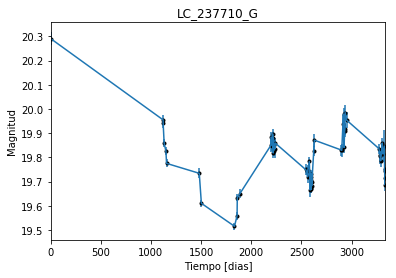

In [2]:
data = np.genfromtxt('LC_237710_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_237710_G')
plt.savefig("LC_237710_G.pdf")

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

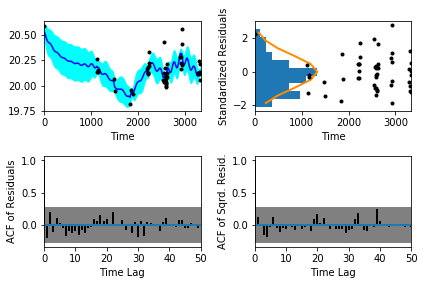

In [6]:
sample.assess_fit()

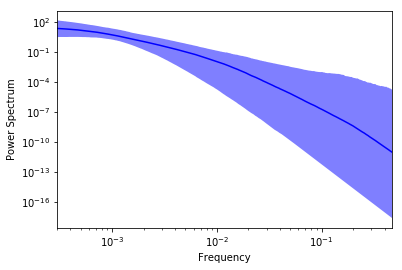

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

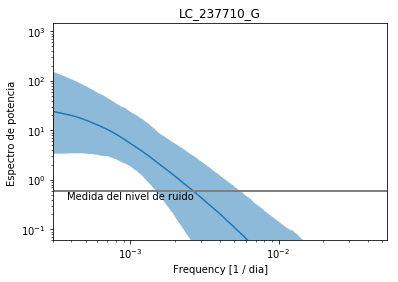

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_237710_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_237710_G')

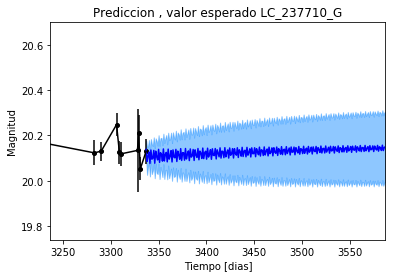

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_237710_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_237710_G')

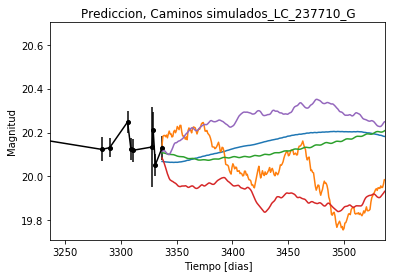

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_237710_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


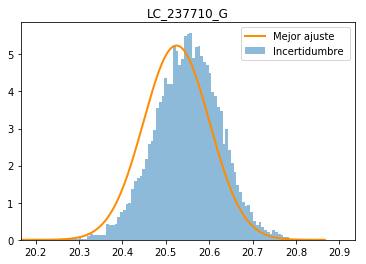

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_237710_G')
plt.savefig("Mejor_ajuste_LC_237710_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_237710_G')

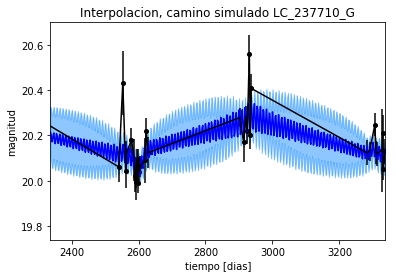

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_237710_G')

Text(0.5,1,'Interpolacion, camino simulado LC_237710_G')

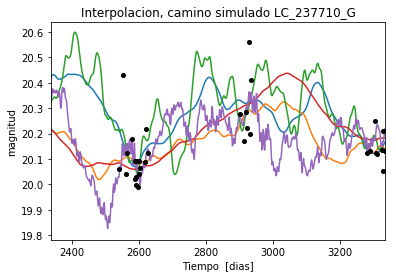

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_237710_G')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 748.016810847
Median: 0.0125907398132
Standard deviation: 0.184670819857
68% credibility interval: [ 0.00104432  0.19875019]
95% credibility interval: [  3.53751944e-04   7.31337408e-01]
99% credibility interval: [  3.03700201e-04   8.94733638e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 833.763055949
Median: 0.00229551284038
Standard deviation: 0.0779784871692
68% credibility interval: [ 0.00048972  0.03463287]
95% credibility interval: [ 0.00031675  0.24673343]
99% credibility interval: [  3.01768318e-04   4.98295700e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 687.666706189
Median: 0.0276998648699
Standard 

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 982.728108521
Median: 62.3279918567
Standard deviation: 1.64188681991
68% credibility interval: [ 60.56408048  63.5313057 ]
95% credibility interval: [ 58.2086203   64.73827352]
99% credibility interval: [ 56.26480222  65.57059189]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 544.280285714
Median: 0.825367001594
Standard deviation: 1.98858283611
68% credibility interval: [ 0.06984446  3.70999726]
95% credibility interval: [ 0.01424457  6.67884687]
99% credibility interval: [ 0.00952981  9.21405402]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 620.201303538
Median: 0.571004530939
Standard deviation: 7.39648030851
68% credibility interval: [ 0.01771938  6.93014904]
95% credibility interval: [  1.20488340e-0

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 13962.703734
Median: 1.41143230281e-33
Standard deviation: 2.70105901423e+65
68% credibility interval: [  6.26916004e-72   5.98610205e-11]
95% credibility interval: [  2.93860349e-130   2.20306692e+000]
99% credibility interval: [  3.35343054e-142   2.53346465e+024]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2696.06540587
Median: 20.192485216
Standard deviation: 0.128997477249
68% credibility interval: [ 20.09475376  20.30604844]
95% credibility interval: [ 19.95613271  20.47818344]
99% credibility interval: [ 19.81063125  20.62589558]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 593.789060328
Median: 0.0118507737854
Standard deviation: 0.222869385465
68% credibility interval: [ 0.          0.31926305]
95% credibility interval: [ 0.          0.80716883]
99% credibility interval: [ 0.          0.91561181]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 593.789060328
Median: 0.0118507737854
Standard deviation: 0.222869385465
68% credibility interval: [ 0.          0.31926305]
95% credibility interval: [ 0.          0.80716883]
99% credibility interval: [ 0.          0.91561181]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1771.86259078
Median: 0.0
Standard deviation: 0.000397522420627
68% cr

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 982.728108521
Median: 62.3279918567
Standard deviation: 1.64188681991
68% credibility interval: [ 60.56408048  63.5313057 ]
95% credibility interval: [ 58.2086203   64.73827352]
99% credibility interval: [ 56.26480222  65.57059189]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1347.36823272
Median: 0.0480205568863
Standard deviation: 0.062353105066
68% credibility interval: [ 0.02765326  0.09997472]
95% credibility interval: [ 0.01699851  0.22765251]
99% credibility interval: [ 0.01236623  0.37975773]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1998.02615903
Median: 1.25444719295
Standard deviation: 0.216301457843
68% credibility interval: [ 1.05980856  1.49097948]
95% credibility interval: [ 0.89781071  1.74810367]
99% credibility interval: [ 0.81812454  1.8939517 ]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 614.880104726
Median: 0.000238245168913
Standard deviation: 0.128398292458
68% credibility interval: [  2.89215289e-06   1.13243144e-02]
95% credibility interval: [  4.88974938e-08   2.48005958e-01]
99% credibility interval: [  5.97301180e-28   1.00992618e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 748.016810847
Median: (-0.0791099514009-0.0477064921637j)
Standard deviation: 1.81858953719
68% credibility interval: [-1.24878430-0.38318639j -0.00656162-0.00844606j]
95% credibility interval: [ -4.59512846e+00+0.j          -2.22268901e-03-0.00215853j]
99% credibility interval: [ -5.62177725e+00+0.j          -1.90820464e-03-0.00665967j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 833.763055949
Median: (-0.0144231325511+1.1130559383j)
Standard deviation: 1.48356912373
68% credibility interval: [-0.21760477+0.71590633j -0.00307701+0.00489763j]
95% credibility interval: [-1.55027188 +5.50897423e-01j -0.00199020 +8.34327881e-05j]
99% credibility interval: [ -3.13088422e+00+5.01887878j  -1.89606626e-03+0.j        ]
Pos